In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('R_MPA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

R_MPA\ADM001_Tmap_T15_R_MPA.tiff
R_MPA\ADM004_Tmap_T15_R_MPA.tiff
R_MPA\CTA002_Tmap_T15_R_MPA.tiff
R_MPA\CTA003_Tmap_T15_R_MPA.tiff
R_MPA\CTA004_Tmap_T15_R_MPA.tiff
R_MPA\ESP001_Tmap_T15_R_MPA.tiff
R_MPA\ESP002_Tmap_T15_R_MPA.tiff
R_MPA\ESP003_Tmap_T15_R_MPA.tiff
R_MPA\ESP006_Tmap_T15_R_MPA.tiff
R_MPA\ESP008_Tmap_T15_R_MPA.tiff
R_MPA\ESP009_Tmap_T15_R_MPA.tiff
R_MPA\ESP010_Tmap_T15_R_MPA.tiff
R_MPA\ESP011_Tmap_T15_R_MPA.tiff
R_MPA\EST004_Tmap_T15_R_MPA.tiff
R_MPA\EXT003_Tmap_T15_R_MPA.tiff
R_MPA\MED001_Tmap_T15_R_MPA.tiff
R_MPA\MED002_Tmap_T15_R_MPA.tiff
R_MPA\MED006_Tmap_T15_R_MPA.tiff
R_MPA\NRT001_Tmap_T15_R_MPA.tiff
R_MPA\NRT002_Tmap_T15_R_MPA.tiff
R_MPA\NRT003_Tmap_T15_R_MPA.tiff
R_MPA\NRT004_Tmap_T15_R_MPA.tiff


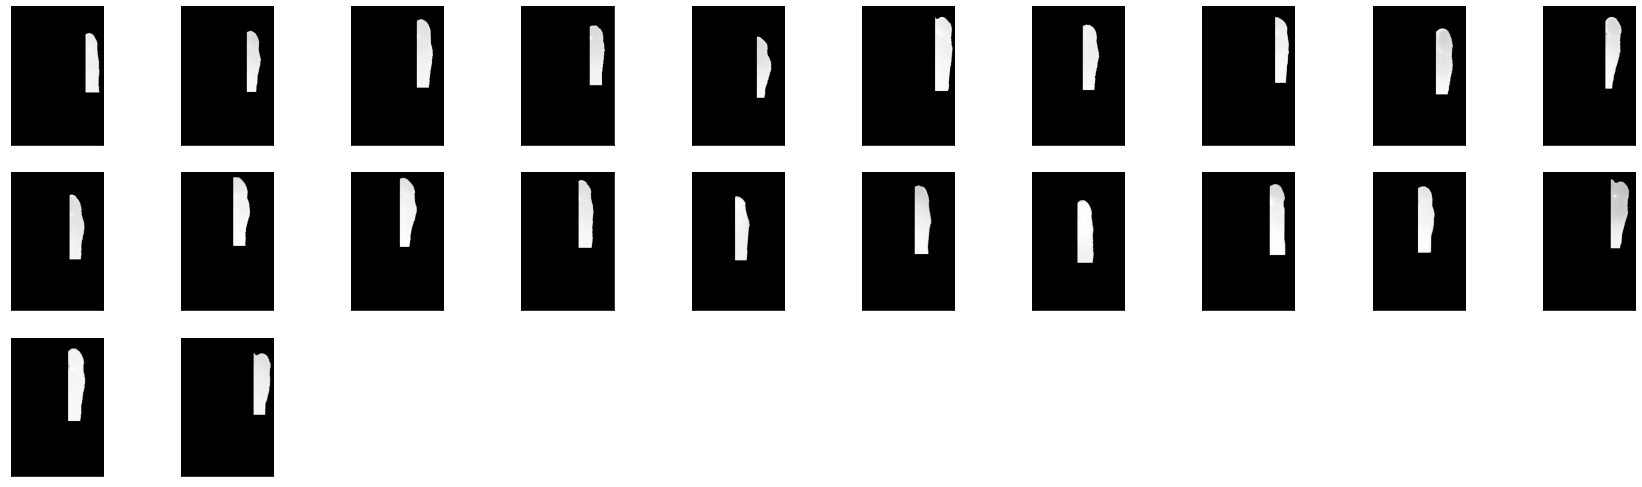

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
R_MPA_mean = []
R_MPA_std = []
R_MPA_max = []
R_MPA_min = []
R_MPA_skew = []
R_MPA_kurtosis = []
R_MPA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    R_MPA_img.append(img)    
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    R_MPA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    R_MPA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    R_MPA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    R_MPA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    R_MPA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    R_MPA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], R_MPA_mean[i], R_MPA_std[i], R_MPA_max[i], R_MPA_min[i], R_MPA_skew[i], R_MPA_kurtosis[i])   


ADM001_Tmap_T15_R_MPA 26.857124 3.3993728 30.711597 0.12731895 -5.209997980376103 29.039570036024813
ADM004_Tmap_T15_R_MPA 19.43976 2.9473872 23.223293 0.065047905 -3.601255762542079 16.910558345841395
CTA002_Tmap_T15_R_MPA 23.372211 2.9792962 27.442987 0.52336884 -4.572631412828498 26.04117680765652
CTA003_Tmap_T15_R_MPA 22.517841 2.8973806 27.369131 0.06921322 -4.2694227882055475 25.671138518166476
CTA004_Tmap_T15_R_MPA 20.24037 3.189586 24.387495 0.061923925 -3.6412430666604334 16.89147784128383
ESP001_Tmap_T15_R_MPA 25.20603 3.236891 28.017797 0.045910746 -5.033537787365852 29.33447928046671
ESP002_Tmap_T15_R_MPA 24.691076 3.2757306 28.10851 0.11014873 -5.192977010936925 29.50241017983828
ESP003_Tmap_T15_R_MPA 27.24322 3.77732 30.502407 0.16635704 -4.741817705419236 24.933097447429418
ESP006_Tmap_T15_R_MPA 22.402163 3.321094 27.217133 0.050538868 -3.2329640347613395 16.398681774535213
ESP008_Tmap_T15_R_MPA 22.84067 3.6789896 27.019974 0.08534211 -3.2700148130907 14.596064030551869


In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'R_MPA_mean': R_MPA_mean, 
        'R_MPA_std': R_MPA_std,
        'R_MPA_max': R_MPA_max,
        'R_MPA_min': R_MPA_min,
        'R_MPA_skew': R_MPA_skew,
        'R_MPA_kurtosis': R_MPA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('R_MPA.csv', index=False) 

,Subject,R_MPA_mean,R_MPA_std,R_MPA_max,R_MPA_min,R_MPA_skew,R_MPA_kurtosis
0,ADM001_Tmap_T15_R_MPA,26.857124,3.399373,30.711597,0.127319,-5.209998,29.039570
1,ADM004_Tmap_T15_R_MPA,19.439760,2.947387,23.223293,0.065048,-3.601256,16.910558
2,CTA002_Tmap_T15_R_MPA,23.372211,2.979296,27.442987,0.523369,-4.572631,26.041177
3,CTA003_Tmap_T15_R_MPA,22.517841,2.897381,27.369131,0.069213,-4.269423,25.671139
4,CTA004_Tmap_T15_R_MPA,20.240370,3.189586,24.387495,0.061924,-3.641243,16.891478
5,ESP001_Tmap_T15_R_MPA,25.206030,3.236891,28.017797,0.045911,-5.033538,29.334479
6,ESP002_Tmap_T15_R_MPA,24.691076,3.275731,28.108509,0.110149,-5.192977,29.502410
7,ESP003_Tmap_T15_R_MPA,27.243219,3.777320,30.502407,0.166357,-4.741818,24.933097
8,ESP006_Tmap_T15_R_MPA,22.402163,3.321094,27.217133,0.050539,-3.232964,16.398682
9,ESP008_Tmap_T15_R_MPA,22.840670,3.678990,27.019974,0.085342,-3.270015,14.596064


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
R_MPA_all = np.concatenate((R_MPA_img[0],R_MPA_img[1],R_MPA_img[2],R_MPA_img[3],R_MPA_img[4],R_MPA_img[5],
                            R_MPA_img[6],R_MPA_img[7],R_MPA_img[8],R_MPA_img[9],R_MPA_img[10],R_MPA_img[11],
                            R_MPA_img[12],R_MPA_img[13],R_MPA_img[14],R_MPA_img[15],R_MPA_img[16],R_MPA_img[17],
                            R_MPA_img[18],R_MPA_img[19],R_MPA_img[20],R_MPA_img[21]))
R_MPA_all_mean = np.mean(R_MPA_all)
R_MPA_all_std = np.std(R_MPA_all)
R_MPA_all_max = np.max(R_MPA_all)
R_MPA_all_min = np.min(R_MPA_all)
R_MPA_all_skew = skew(R_MPA_all)
R_MPA_all_kurtosis = kurtosis(R_MPA_all)


# Initialize data of lists
data2 = {'Variables':['R_MPA_all_mean', 'R_MPA_all_std', 'R_MPA_all_max', 'R_MPA_all_min', 'R_MPA_all_skew', 
                      'R_MPA_all_kurtosis'],
         'Values': [R_MPA_all_mean, R_MPA_all_std, R_MPA_all_max, R_MPA_all_min, R_MPA_all_skew, R_MPA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('R_MPA_all.csv', index=False) 


,Variables,Values
0,R_MPA_all_mean,24.087006
1,R_MPA_all_std,4.408169
2,R_MPA_all_max,32.188896
3,R_MPA_all_min,0.045911
4,R_MPA_all_skew,-1.820381
5,R_MPA_all_kurtosis,6.507092


In [7]:
a_file = open("R_MPA.txt", "w")
np.savetxt(a_file, R_MPA_all)
a_file.close()